# Software Coaching for Python
# Week 1: Web Scraping

Instructor: Kang-Pyo Lee 

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
path = "/content/gdrive/Shareddrives/Software_Coaching_Fall_2021"
my_folder = "HLP"     # *** REPLACE WITH YOUR FOLDER NAME ***

Mounted at /content/gdrive


In [ ]:
! pip install --user requests bs4

## Fetch HTML content from a webpage using Requests

https://fivethirtyeight.com/features/what-are-the-odds-of-each-world-series-matchup/

In [3]:
url = "https://fivethirtyeight.com/features/what-are-the-odds-of-each-world-series-matchup/"

*** Run the cells for HTTP requests only when needed. 

In [4]:
import requests

r = requests.get(url)

https://requests.kennethreitz.org/

In [5]:
r.content

b'<!DOCTYPE html>\n<html lang="en-US" class="no-js">\n<head>\n\t<meta charset="UTF-8">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0">\n\t\t\t\t<link rel=\'dns-prefetch\' href=\'//dcf.espn.com\' />\n\t\t<script src="https://dcf.espn.com/TWDC-DTCI/prod/Bootstrap.js"></script><title>What Are The Odds Of Each World Series Matchup? | FiveThirtyEight</title>\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n<!-- Jetpack Site Verification Tags -->\n\t\t\t\t\t<link\n\t\t\trel="preload"\n\t\t\tas="font"\n\t\t\ttype="font/woff2"\n\t\t\thref="https://fivethirtyeight.com/wp-content/themes/espn-fivethirtyeight/dist/fonts/AtlasGrotesk-Bold-Web.woff2"\n\t\t\tcrossorigin="anonymous">\n\t\t\t\t\t<link\n\t\t\trel="preload"\n\t\t\tas="font"\n\t\t\ttype="font/woff2"\n\t\t\thref="https://fivethirtyeight.com/wp-content/themes/espn-fivethirtyeight/dist/fonts/AtlasGrotesk-Regular-Web.woff2"\n\t\t\tcrossorigin="anonymous">\n\t\t\t\t\t<link\n\t\t\trel="preload"\n\t\t\ta

Note that the HTML content you have retrieved does not always corresopond to what you are actually seeing on a web browser. Web sites are able to distinguish program access from normal human access using a web browser. Some web sites do not care about the program access, whereas other web sites do care about it and block the undesirable access. In this case, take a close look at the HTML content and you will see it does not have the information you expected.  

## Load the fetched content as a BeautifulSoup object

In [6]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(r.content, "html.parser")

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

## Extract the title of the webpage

Do not confuse the title of a webpage with the title of an article.

In [7]:
soup.title

<title>What Are The Odds Of Each World Series Matchup? | FiveThirtyEight</title>

In [8]:
soup.title.text

'What Are The Odds Of Each World Series Matchup? | FiveThirtyEight'

## Extract the title of the article

If you want to extract information from a webpage, always start by identifying the corresponding HTML element in the HTML code using the Inspect feature of the Chrome Browser. 

When searching for an HTML element using <b>BeautifulSoup</b>, you can use either the <b>find</b> method or <b>find_all</b> method.
- The <b>find</b> method returns the first found element. 
- The <b>find_all</b> method returns a list of all found elements in order. 

You can simply choose to use the <b>find</b> mehtod if you are confident that there is only one element matching or the element you are searching for is the first element matching.  

In [9]:
soup.find(name="h1", attrs={"class": "article-title article-title-single entry-title"})

<h1 class="article-title article-title-single entry-title">
									What Are The Odds Of Each World Series Matchup?								</h1>

https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find

In addition to specifying the tag of the element you are searching for in the first parameter `name`, you can use any clues that help identify the element by specifying them in the second parameter `attrs`. Note the `attrs` parameter takes a dictionary. 

In the above example, if the class name is unique, you will always be able to find the element. If not, the <b>find</b> method will return the first found element, which could not be the element you are trying to find. In this case, you would better use different clues in the `attrs` parameter or consider using the <b>find_all</b> method.  

In [ ]:
soup.find("h1", {"class": "article-title article-title-single entry-title"}).text

'\n\t\t\t\t\t\t\t\t\tWhat Are The Odds Of Each World Series Matchup?\t\t\t\t\t\t\t\t'

In [ ]:
soup.find("h1", {"class": "article-title article-title-single entry-title"}).text.strip()

'What Are The Odds Of Each World Series Matchup?'

## Extract the author name of the article

In [ ]:
soup.find("a", {"class": "author url fn"})

<a class="author url fn" href="https://fivethirtyeight.com/contributors/neil-paine/" rel="author" title="">Neil Paine</a>

In [ ]:
soup.find("a", {"class": "author url fn"}).text

'Neil Paine'

In [ ]:
soup.find("a", {"class": "author url fn"})["href"]

'https://fivethirtyeight.com/contributors/neil-paine/'

## Fetch an image from the webpage

In [10]:
soup.find("picture", {"class": "featured-picture"})

<picture class="featured-picture">
<source media="(min-width: 768px)" srcset="https://fivethirtyeight.com/wp-content/uploads/2021/10/BASEBALL-PLAYOFFS-2021-PREVIEW-4x3-1.png?w=575 1x, https://fivethirtyeight.com/wp-content/uploads/2021/10/BASEBALL-PLAYOFFS-2021-PREVIEW-4x3-1.png?w=1150 2x"/>
<source srcset="https://fivethirtyeight.com/wp-content/uploads/2021/10/BASEBALL-PLAYOFFS-2021-PREVIEW-4x3-1.png?w=575 1x, https://fivethirtyeight.com/wp-content/uploads/2021/10/BASEBALL-PLAYOFFS-2021-PREVIEW-4x3-1.png?w=1150 2x"/>
<img alt="A photo illustration of Mookie Betts, Carlos Correa, Randy Arozarena, and Buster Posey" class="" sizes="(max-width: 768px) 100vw, (max-width: 1080px) 66vw, 684px" src="https://fivethirtyeight.com/wp-content/uploads/2021/10/BASEBALL-PLAYOFFS-2021-PREVIEW-4x3-1.png?w=575" srcset="https://fivethirtyeight.com/wp-content/uploads/2021/10/BASEBALL-PLAYOFFS-2021-PREVIEW-4x3-1.png?w=575 1x, https://fivethirtyeight.com/wp-content/uploads/2021/10/BASEBALL-PLAYOFFS-2021-PRE

When the element you are searching for has no unique clues, you should try finding the parent/ancestor element, by which you can narrow down the scope of search, and then you can start another search from there. This is the beauty of hierarchical search. 

In [11]:
soup.find("picture", {"class": "featured-picture"}).find("img")

<img alt="A photo illustration of Mookie Betts, Carlos Correa, Randy Arozarena, and Buster Posey" class="" sizes="(max-width: 768px) 100vw, (max-width: 1080px) 66vw, 684px" src="https://fivethirtyeight.com/wp-content/uploads/2021/10/BASEBALL-PLAYOFFS-2021-PREVIEW-4x3-1.png?w=575" srcset="https://fivethirtyeight.com/wp-content/uploads/2021/10/BASEBALL-PLAYOFFS-2021-PREVIEW-4x3-1.png?w=575 1x, https://fivethirtyeight.com/wp-content/uploads/2021/10/BASEBALL-PLAYOFFS-2021-PREVIEW-4x3-1.png?w=1150 2x"/>

Because there is only one img element in the picture element found above, you do not have to add any additional attributes, or clues, in the find method. 

In [13]:
soup.find("picture", {"class": "featured-picture"}).find("img")["src"]

'https://fivethirtyeight.com/wp-content/uploads/2021/10/BASEBALL-PLAYOFFS-2021-PREVIEW-4x3-1.png?w=575'

In [14]:
img_url = soup.find("picture", {"class": "featured-picture"}).find("img")["src"]
img_url

'https://fivethirtyeight.com/wp-content/uploads/2021/10/BASEBALL-PLAYOFFS-2021-PREVIEW-4x3-1.png?w=575'

In [15]:
from IPython.display import Image

Image(url=img_url)

Note that this is not saving the image. It is just displaying the image fetched from the website. 

In [17]:
outcome_folder = f"{path}/{my_folder}/outcome"
outcome_folder

'/content/gdrive/Shareddrives/Software_Coaching_Fall_2021/HLP/outcome'

In [18]:
import os

if not os.path.isdir(outcome_folder):         # Check if there is an existing directory named outcome.
    os.mkdir(outcome_folder)                  # Create a new directory named data.
outcome_folder

'/content/gdrive/Shareddrives/Software_Coaching_Fall_2021/HLP/outcome'

The <b>os.mkdir</b>(path) function creates a directory named `path`.

We are going to save all of our outcome files in the `outcome` directory. 

In [ ]:
r = requests.get(img_url)

with open(f"{outcome_folder}/photo.jpg", "w+b") as fw:
    fw.write(r.content)

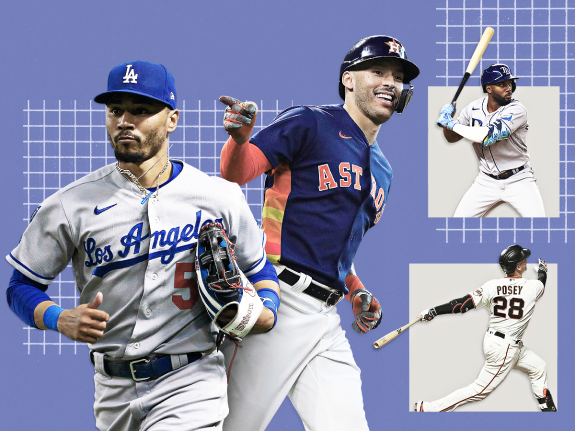

In [ ]:
Image(f"{outcome_folder}/photo.jpg")

## Extract the body text of the article

In [ ]:
soup.find("div", attrs={"class": "entry-content single-post-content"})

<div class="entry-content single-post-content">
<p data-paragraph="main">The 2021 MLB regular season came down to its final day <a href="https://www.espn.com/mlb/story/_/id/32328371/mlb-playoffs-everything-need-know-tiebreakers-wild-cards-last-day-mlb-season" rel="noopener" target="_blank">with a lot of potential for chaos</a> — including a <a href="https://www.wcvb.com/article/what-happens-mlb-red-sox-end-4-way-wild-card-tie/37839411" rel="noopener" target="_blank">possible four-way tie</a> for the American League’s two wild-card slots and contingency plans for <a href="https://www.cbssports.com/mlb/news/mlb-postseason-picture-final-baseball-standings-red-sox-yankees-clinch-playoff-spots-on-final-day/" rel="noopener" target="_blank">multiple extra games</a> just to get the playoff field set. But while Sunday provided some momentary intrigue, the most dramatic of scenarios never quite materialized, as the San Francisco Giants <a href="https://www.espn.com/mlb/story/_/id/32334196/san-fr

In [ ]:
soup.find("div", attrs={"class": "entry-content single-post-content"}).text

'\nThe 2021 MLB regular season came down to its final day with a lot of potential for chaos — including a possible four-way tie for the American League’s two wild-card slots and contingency plans for multiple extra games just to get the playoff field set. But while Sunday provided some momentary intrigue, the most dramatic of scenarios never quite materialized, as the San Francisco Giants sealed up the NL West and the Boston Red Sox and New York Yankees both claimed the AL’s wild cards. Now we look ahead to the postseason, where a field full of strong teams and plenty of compelling matchups has us thinking that baseball’s October spectacle is just getting started.\n\nHow we’re forecasting the 2021 MLB playoffs\nChances of reaching each playoff round for 2021 MLB postseason teams, according to the FiveThirtyEight model\n\nChance to…\n\nChance to…\nAmerican League\nMake LCS\nMake WS\nWin WS\n\nNational League\nMake LCS\nMake WS\nWin  WS\nRays\n62%\n36%\n18%\n\nDodgers\n47%\n35%\n25%\nAst

In [ ]:
soup.find("div", attrs={"class": "entry-content single-post-content"}).text.replace("\n", " ").strip()

'The 2021 MLB regular season came down to its final day with a lot of potential for chaos — including a possible four-way tie for the American League’s two wild-card slots and contingency plans for multiple extra games just to get the playoff field set. But while Sunday provided some momentary intrigue, the most dramatic of scenarios never quite materialized, as the San Francisco Giants sealed up the NL West and the Boston Red Sox and New York Yankees both claimed the AL’s wild cards. Now we look ahead to the postseason, where a field full of strong teams and plenty of compelling matchups has us thinking that baseball’s October spectacle is just getting started.  How we’re forecasting the 2021 MLB playoffs Chances of reaching each playoff round for 2021 MLB postseason teams, according to the FiveThirtyEight model  Chance to…  Chance to… American League Make LCS Make WS Win WS  National League Make LCS Make WS Win  WS Rays 62% 36% 18%  Dodgers 47% 35% 25% Astros 56 27 12  Giants 41 24 1

## Extract a list of article titles

https://fivethirtyeight.com/features/

In [ ]:
url = "https://fivethirtyeight.com/features/"
r = requests.get(url)
soup = BeautifulSoup(r.content, "html.parser")

In [ ]:
h2_list = soup.find_all(name="h2", attrs={"class": "article-title entry-title"})
h2_list

[<h2 class="article-title entry-title">
 <a href="https://fivethirtyeight.com/features/how-carmelo-anthony-can-help-the-lakers/" name="&amp;lpos=fivethirtyeightFeature&amp;lid=Feature1">
 				How Carmelo Anthony Can Help The Lakers			</a>
 </h2>, <h2 class="article-title entry-title">
 <a href="https://fivethirtyeight.com/features/can-you-evade-your-evil-twin/" name="&amp;lpos=fivethirtyeightFeature&amp;lid=Feature2">
 				Can You Evade Your Evil Twin?			</a>
 </h2>, <h2 class="article-title entry-title">
 <a href="https://fivethirtyeight.com/features/college-football-teams-are-scoring-more-than-ever-big-ten-defenses-dont-care/" name="&amp;lpos=fivethirtyeightFeature&amp;lid=Feature3">
 				College Football Teams Are Scoring More Than Ever. Big Ten Defenses Don’t Care.			</a>
 </h2>, <h2 class="article-title entry-title">
 <a href="https://fivethirtyeight.com/features/americans-want-the-government-to-act-on-climate-change-whats-the-hold-up/" name="&amp;lpos=fivethirtyeightFeature&amp;l

https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all

The <b>find_all</b> method looks through a tag’s descendants and retrieves all descendants that match your filters.

In [ ]:
len(h2_list)

9

In [ ]:
for h2 in h2_list:
    print(h2.text.strip())

How Carmelo Anthony Can Help The Lakers
Can You Evade Your Evil Twin?
College Football Teams Are Scoring More Than Ever. Big Ten Defenses Don’t Care.
Americans Want The Government To Act On Climate Change. What’s The Hold-Up?
Why The U.S. Was Unprepared For COVID, According To The Former FDA Chief
The Debt Ceiling Is Dangerous. Here’s Why It Probably Isn’t Going Anywhere.
The Broncos And Panthers Looked Like World-Beaters A Week Ago. What Happened?
What Our New NHL Forecast Says About This Season
How Our NHL Predictions Work


In [ ]:
for h2 in h2_list:
    url = h2.find("a")["href"]     # Starting from each h2 element, go deeper by one level to find an a element 
    print(url)

https://fivethirtyeight.com/features/how-carmelo-anthony-can-help-the-lakers/
https://fivethirtyeight.com/features/can-you-evade-your-evil-twin/
https://fivethirtyeight.com/features/college-football-teams-are-scoring-more-than-ever-big-ten-defenses-dont-care/
https://fivethirtyeight.com/features/americans-want-the-government-to-act-on-climate-change-whats-the-hold-up/
https://fivethirtyeight.com/videos/why-the-u-s-was-unprepared-for-covid-according-to-the-former-fda-chief/
https://fivethirtyeight.com/features/the-debt-ceiling-is-dangerous-but-its-probably-not-going-away-anytime-soon/
https://fivethirtyeight.com/features/the-broncos-and-panthers-looked-like-world-beaters-a-week-ago-what-happened/
https://fivethirtyeight.com/features/what-our-new-nhl-forecast-says-about-this-season/
https://fivethirtyeight.com/methodology/how-our-nhl-predictions-work/


The hierarchical search of BeautifulSoup is very useful in navigating the nested HTML elements. 